In [9]:
from collections import Counter
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [17]:
def plot_pmf_and_examplesample(model, support, pars, examplesample_size):
    fig = plt.figure(1)
    plt.subplot(121)
    plt.vlines(support, 0, getattr(stats,model).pmf(support, **pars), colors='b', lw=5)
    plt.xlabel(model + " distribution " + str(pars))

    plt.subplot(122)
    sample = getattr(stats,model).rvs(size = examplesample_size,**pars)
    value, count = zip(*Counter(sample).items())
    count = np.array(count)
    count = count/float(sum(count))
    plt.vlines(value, 0, count, colors='b', lw=5)
    plt.xlim([min(support)-1,max(support)+1])
    plt.xlabel("i.i.d. sample (n = " + str(examplesample_size) + ")")
    
    return sample

array([6, 7, 7, 7, 6, 5, 7, 7, 2, 5])

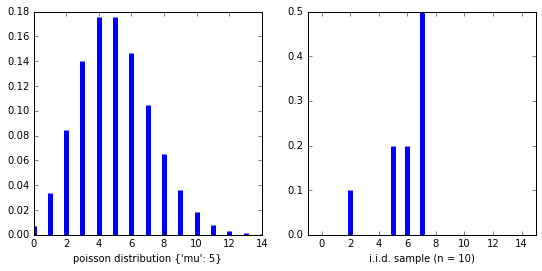

In [18]:
model = "poisson"
pars = {'mu': 5}
support = np.arange(15)
examplesample_size = 10

pylab.rcParams['figure.figsize']=(9,4)
plot_pmf_and_examplesample(model, support, pars, examplesample_size)

In [10]:
def poisson(k, mu):
    return np.exp(-mu)*mu**k/math.factorial(k)

In [11]:
poisson(k=1, mu=np.array([1,2,4]))

array([ 0.36787944,  0.27067057,  0.07326256])

In [12]:
def likelihood(model,dats,pars):
    log_likelihood = 0
    for x in dats.values()[0]:
         log_likelihood = log_likelihood + np.log(model(x,**pars))
    return np.exp(log_likelihood)

In [13]:
model = getattr(stats,"poisson").pmf #poisson  
dats = {'k': [1,2,4,5,6]}  
pars = {'mu': [5,6]}          

likelihood(model, dats, pars)

array([  1.27744747e-05,   2.29156969e-06])

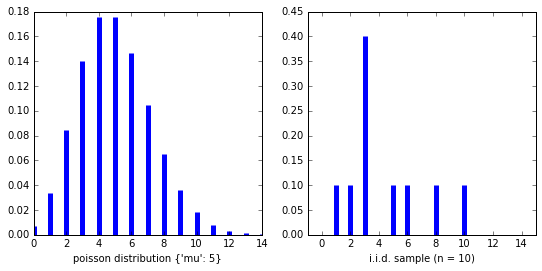

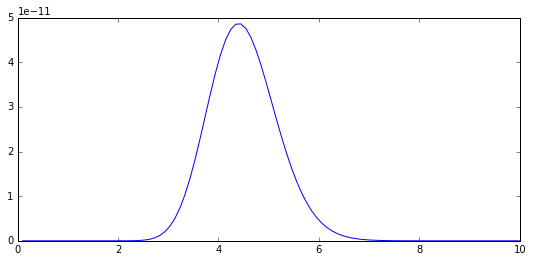

In [30]:
model = "poisson"
pars = {'mu': 5}
support = np.arange(15)
examplesample_size = 10

pylab.rcParams['figure.figsize']=(9,4)
dats=dict([])
dats['k'] = plot_pmf_and_examplesample(model, support, pars, examplesample_size)

support = np.linspace(0, 10, 100)[1:]
pars = {'mu': support}          
model = getattr(stats,"poisson").pmf

fig=plt.figure(2)
plt.plot(support,likelihood(model, dats, pars))

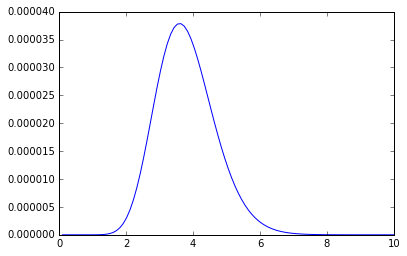

In [15]:
support = np.linspace(0, 10, 100)[1:]
pars = {'mu': support}          

plt.plot(support,likelihood(model, dats, pars))